# TP1 - PEIA - CEIA
>Autor: **TEICH Juan Ignacio**

## Ejercicio 1
**Enunciado**. De 10 monedas hay 1 monedas falsas, que tienen probabilidad 0,2 de mostrar cara al ser lanzadas. Si se toma
una moneda al azar, se lanza 12 veces, y en todas ellas se obtiene cara, ¿qué es más probable, que la moneda elegida sea
justa o que esté cargada? Dar las probabilidades tanto de que la moneda elegida sea falsa, como de que sea justa.

**Resolución**.<br>
Para poder determinar si es más probable que la moneda elegida sea justa o falsa dado que se lanzó 12 veces y en todas las veces se obtuvo cara, se debe calcular la probabilidad condicional de que la moneda sea falsa (o justa) dado que saco 12 veces seguidas cara, en notación matemática:
$$
P(\text{moneda falsa}/\text{sale 12 veces seguidas cara}).
$$
Para poder calcular esto recurrimos al Teorema de Bayes, que nos dice:
$$
P(B_j/A) = \frac{P(A/B_j)\,P(B_j)}{\sum_i P(A/B_i)\cdot P(B_i)},
$$
llevado a nuestro problema:
$$
P(\text{moneda falsa}/\text{sale 12 veces seguida cara}) = \frac{P(\text{sale 12 veces seguida cara}/\text{moneda falsa})\,P(\text{moneda falsa})}{P(\text{sale 12 veces seguida cara}/\text{moneda falsa})\,P(\text{moneda falsa}) + P(\text{sale 12 veces seguida cara}/\text{moneda justa})\,P(\text{moneda justa})}.
$$
Sabemos que:
$$
P(\text{moneda falsa}) = \frac{1}{10} \quad\quad P(\text{moneda justa}) = \frac{9}{10},
$$
y considerando que cada tirada de moneda es un experimento donde las tiradas son independientes entre sí, es decir, el resultado de la tirada $i$ no afecta el de la tirada $i+1$:
$$
P(\text{sale 12 veces seguida cara}/\text{moneda falsa}) = P(\text{cara}/\text{moneda falsa})^{12} \quad\quad P(\text{sale 12 veces seguida cara}/\text{moneda justa}) = P(\text{cara}/\text{moneda justa})^{12},
$$
siendo por enunciado:
$$
P(\text{cara}/\text{moneda falsa}) = 0.20 \quad\quad P(\text{cara}/\text{moneda falsa}) = 0.50.
$$
Juntando el desarrollo tenemos:
$$
P(\text{moneda falsa}/\text{sale 12 veces seguida cara}) = \frac{P(\text{cara}/\text{moneda falsa})^{12}\,P(\text{moneda falsa})}{P(\text{cara}/\text{moneda falsa})^{12}\,P(\text{moneda falsa}) + P(\text{cara}/\text{moneda justa})^{12}\,P(\text{moneda justa})}.
$$
Análogamente para saber la probabilidad de que sea justa dado que sale 12 veces seguida cara:
$$
P(\text{moneda justa}/\text{sale 12 veces seguida cara}) = \frac{P(\text{cara}/\text{moneda justa})^{12}\,P(\text{moneda justa})}{P(\text{cara}/\text{moneda falsa})^{12}\,P(\text{moneda falsa}) + P(\text{cara}/\text{moneda justa})^{12}\,P(\text{moneda justa})}.
$$

A continuación se calculan estas probabilidades utilizando python:

In [3]:
P_falsa = 1/10
P_justa = 1/10
P_cara_falsa = 0.20
P_cara_justa = 0.50

P_falsa_12caras = (P_cara_falsa**12 * P_falsa) / (P_cara_falsa**12 * P_falsa + P_cara_justa**12 * P_justa)
P_justa_12caras = (P_cara_justa**12 * P_justa) / (P_cara_falsa**12 * P_falsa + P_cara_justa**12 * P_justa)

print(f"La probabilidad de que la moneda sea FALSA dado que sale 12 veces seguidas cara es {P_falsa_12caras}")
print(f"La probabilidad de que la moneda sea JUSTA dado que sale 12 veces seguidas cara es {P_justa_12caras}")


La probabilidad de que la moneda sea FALSA dado que sale 12 veces seguidas cara es 1.6776934529745588e-05
La probabilidad de que la moneda sea JUSTA dado que sale 12 veces seguidas cara es 0.9999832230654703


Concluimos entonces que:
- **Es más probable que la moneda elegida sea justa.**
- La probabilidad de que la moneda sea **falsa** o cargada dado que sale 12 veces seguidas cara es de **0.000017**
- La probabilidad de que la moneda sea **justa** dado que sale 12 veces seguidas cara es de **0.999983**

# Ejercicio 2
**Enunciado**. Sean X e Y dos v.a. continuas con densidad conjunta:
$$
f_{X,Y}=\begin{cases}
    Ky && 16x^2\leq y\leq 6x \\
    0 && \text{en otro caso}
\end{cases}
$$
Encontrar:
1. Determine el valor de $K$.
2. Encuentre la densidad marginal $f_Y(y)$ de $Y$.
2. Encuentre la densidad condicional $f_{X|Y}(x|y)$ de $X$ dado $Y$.

**Resolución**. <br>
**Ítem 1.** Para encontrar el valor de $K$ planteamos que se debe cumplir:
$$
1 = \int \int f_{X,Y} dA.
$$
Además, a continuación se grafica en python las funciones que limitan la función de densidad. 

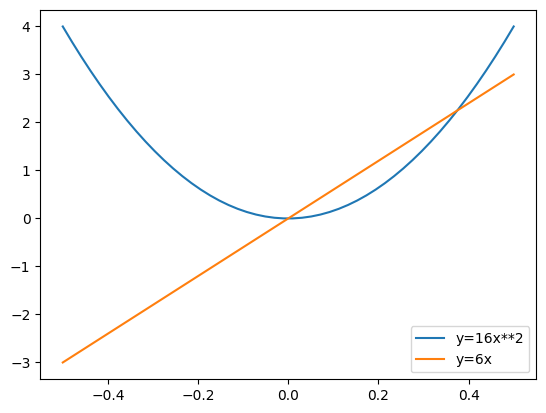

In [11]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-0.5,0.5)
y1 = 16*x**2
y2 = 6*x

plt.plot(x, y1, label="y=16x**2")
plt.plot(x, y2, label="y=6x")
plt.legend()
plt.show()

Podemos ver que si consideramos barrer en y el área, se va de $y=16x^2$ a $y=6x$, y $x$ va de $0$ a $6/16$ (las intersecciones entre las 2 curvas). Entonces podemos reescribir la integral como:
$$
1 = \int_0^{6/16} \int_{16x^2}^{6x} Ky \, dy\, dx.
$$
Integrando la primer integral obtenemos:
$$
1 = \int_0^{6/16} k \left(  18 x^2 - 128 x^4 \right)\, dx,
$$
luego:
$$
1 = k \left[ \frac{18}{3} \left( \frac{6}{16} \right)^2 - \frac{128}{5} \left( \frac{6}{16} \right)^5\right] = k \frac{81}{640},
$$
por lo que obtenemos:
$$
k = \frac{640}{81}.
$$


**Ítem 2.** Para obtener la densidad marginal $f_Y(y)$, buscamos obtener algo de la forma:
$$
1 = \int_{a}^{b} f_Y(y) \,dy.
$$
Si re-expresamos los límites que contienen al función de densidad como función de $y$ obtenemos:
$$
16x^2=y \Longrightarrow x=\pm \sqrt{\frac{y}{16}}, \\
6x =y \Longrightarrow x = \frac{y}{6}.
$$
Entonces, observando el gráfico del ítem anterior podemos decir que la integral en $x$ debe ir de $y/6$ a $\sqrt{y/16}$, por lo que podemos escribir:
$$
1 = \int \int_{y/6}^{\sqrt{y/16}} Ky\,dx\,dy.
$$
Integrando:
$$
1 = \int Ky\,x|_{y/6}^{\sqrt{y/16}}\,dy = \int Ky\left(\sqrt{\frac{y}{16}} - \frac{y}{6}\right)\,dy.
$$
Y lo que tenemos dentro del integrando es la densidad marginal de $Y$:
$$
f_Y(y) = Ky\left(\sqrt{\frac{y}{16}} - \frac{y}{6}\right)
$$


**Ítem 3.** Para obtener la densidad condicional $f_{X|Y}(x,y)$ de $X$ dado $Y$, planteamos:
$$
f_{X|Y} = \frac{f_{XY}}{f_{Y}} = \frac{Ky}{Ky\left(\sqrt{\frac{y}{16}} - \frac{y}{6}\right)}.
$$
Simplificando obtenemos
$$
f_{X|Y}  = \left(\sqrt{\frac{y}{16}} - \frac{y}{6}\right)^{-1}.
$$

# Ejercicio 3

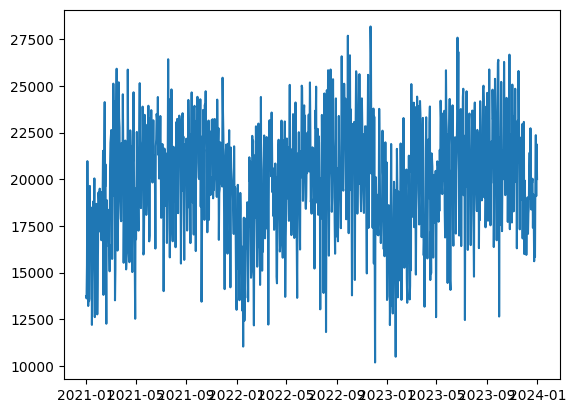

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

inputData = pd.read_excel("Datos_primer_TP_23Co2025_a2326.xlsx")
plt.plot(inputData["Fecha"], inputData["Ventas"])
plt.show()